# INGEST

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from random import seed
from random import random

# GENERATE RANDOM DATA

In [2]:
np.random.seed(12345)

In [3]:
n = [512, 1024, 2048, 4096, 8192]
sort_time = []
total_array=[]

for x in range(0,len(n)):
    
    start_time = time.time()
    array = np.sort(np.random.randint(1,10001, n[x]))
    end_time = time.time()
    t = end_time - start_time
    sort_time.append(t * 1000)
    total_array.append(array)

# DEFINE & CALL FUNCTIONS

In [4]:
def linear_search(myarray, item):
    i = 0
    while i < len(array):
        if myarray[i] == item:
            return i 
        i += 1
    return None

In [5]:
def binary_search(myarray, item):
    low_idx = 0
    high_idx = len(myarray) - 1
    
    while low_idx <= high_idx:
        mid_idx = (low_idx + high_idx) // 2
        guess = myarray[mid_idx]
        
        if guess == item:
            return mid_idx
        elif guess > item:
            high_idx = mid_idx - 1
        else: 
            low_idx = mid_idx + 1   
    return None

In [6]:
ls_time = []
bs_time = []


for x in range(0,len(n)):    
    
    target = total_array[x][-1]
    
    start_time = time.time()
    linear_search(total_array[x], target)
    end_time = time.time()
    ls_t = (end_time - start_time) *1000
    ls_time.append(ls_t)
    
    start_time = time.time()
    binary_search(total_array[x], target)
    end_time = time.time()
    bs_t = (end_time - start_time) *1000
    bs_time.append(bs_t)

    
print(ls_time)
print(bs_time)

[0.0, 0.0, 0.0, 0.9970664978027344, 1.9946098327636719]
[0.0, 0.0, 0.0, 0.0, 0.0]


# CREATE TABLE & GRAPHS

In [7]:
data = {"Lengths of Array": [n[0],n[1],n[2],n[3],n[4]]}
df=pd.DataFrame(data)
df["Sort Time"] = sort_time
df["Linear Search Time for Sorted Arrays"] = ls_time
df["Binary Search Time for Sorted Arrays"] = bs_time
df["Binary Search Time Plus Sort Time"] = df["Binary Search Time for Sorted Arrays"] + df["Sort Time"]
df

,Lengths of Array,Sort Time,Linear Search Time for Sorted Arrays,Binary Search Time for Sorted Arrays,Binary Search Time Plus Sort Time
0,512,1.016378,0.000000,0.0,1.016378
1,1024,0.000000,0.000000,0.0,0.000000
2,2048,0.000000,0.000000,0.0,0.000000
3,4096,0.000000,0.997066,0.0,0.000000
4,8192,0.987768,1.994610,0.0,0.987768


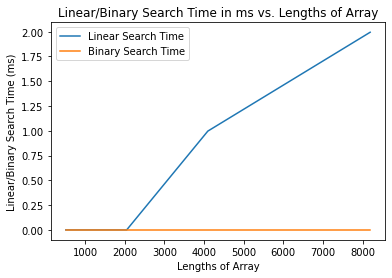

In [13]:
plt.plot(df["Lengths of Array"], df["Linear Search Time for Sorted Arrays"], label="Linear Search Time")
plt.plot(df["Lengths of Array"], df["Binary Search Time for Sorted Arrays"], label="Binary Search Time")
plt.title("Linear/Binary Search Time in ms vs. Lengths of Array")
plt.xlabel("Lengths of Array")
plt.ylabel("Linear/Binary Search Time (ms)")
plt.legend()

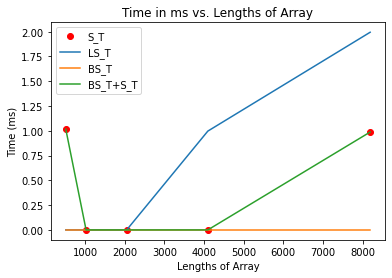

In [19]:
plt.plot(df["Lengths of Array"], df["Sort Time"], "ro", label="S_T")
plt.plot(df["Lengths of Array"], df["Linear Search Time for Sorted Arrays"], label="LS_T")
plt.plot(df["Lengths of Array"], df["Binary Search Time for Sorted Arrays"], label="BS_T")
plt.plot(df["Lengths of Array"], df["Binary Search Time Plus Sort Time"], label="BS_T+S_T")

plt.title("Time in ms vs. Lengths of Array")
plt.xlabel("Lengths of Array")
plt.ylabel("Time (ms)")
plt.legend()

# CONCLUSION

Comparing linear search time and binary search time, we can see that they are very close when the arrays are relatively small. However, as the array number increases, it takes much longer for linear search while binary search stays relatively the same. In the worest case, linear search needs to search every single number to find the target, while binary search can always start with the middle number and remove half of the sorted list that does not include the target. 

We can see the reasons behind them with big O notation (worest-case scenario): O(n) for linear search and O(log(n)) for binary search, with n as the array numbers. We can understand big O notations as the steps needed to complete processing. Of course, the more steps are, the more processing time it will be. Thus, it is efficient to use both linear search on small data sets, or when the data set cannot be sorted for some reasons. However, it can be more much sufficient to use binary search for big sorted data sets.

Default sort type in numpy.sort is quicksort, with big O notation (time worest-case senario) O(n^2) for n numbers. We can tell from the table and the graph that as data set becomes larger, sort time increases as well. Quicksort is considered as a fast sorting algorithm. 

Since binary search can only be performed on sorted data sets, it is more efficient to compare the binary search time plus the sorting time with linear search time. From graph "Time in ms vs. Lengths of Array", we can see that even plus sorting time, binary research is more time efficient than linear search in large date sets. 

Understanding the algorithms for linear search and binary search is essential for data engineers, becasue they can determine which one to be used for different data sets and for different scenarios. Usually linear search is simplier and less chance of bugs, while binary search can become rather completed but fast. 